# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Darren
- **Email:** 18221050@std.stei.itb.ac.id
- **ID Dicoding:** darren_J5E4

## Menentukan Pertanyaan Bisnis

- What is the monthly trend of bike rentals over the two-year period (2011-2012)? (Apa trend bulanan penyewaan sepeda selama periode dua tahun (2011-2012)?)
- How does weather condition impact bike rentals over the two-year period (2011-2012)? (Bagaimana kondisi cuaca memengaruhi penyewaan sepeda selama periode dua tahun (2011-2012)?)
- What is the daily bike rental pattern on weekdays versus weekends over the two-year period (2011-2012)? (Bagaimana pola penyewaan sepeda harian pada hari kerja versus akhir pekan selama periode dua tahun (2011-2012)?)

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

## Gathering Data
Before asking the analytical question, we first need to read and see the data

In [7]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The data above shows the bike sharing counts aggregated on daily basis.

In [10]:
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The data above shows the bike sharing counts aggregated on hourly basis.

#### Analytical/Business Question
After seeing the columns of the data and understanding the meaning, these are the questions that can be asked
- What is the monthly trend of bike rentals over the two-year period (2011-2012)?
- How does weather condition impact bike rentals over the two-year period (2011-2012)?
- What is the daily bike rental pattern on weekdays versus weekends over the two-year period (2011-2012)?

Now to answer these questions, we don't need the data that's been aggregated on hourly basis, so we'll be using day_df instead

### Asessing Data
After reading the data, we now need to assess the data to check the quality and structure of the data, afterwards we need to clean the data

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


We can see that some categorical columns data types are int64 not categorical, therefor we need to change them

#### Checking for missing values

In [16]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

#### Changing data types

In [20]:
cols = ['season' , 'mnth' , 'holiday' , 'holiday' , 'weekday' , 'workingday' , 'weathersit']

In [21]:
for col in cols:
    day_df[col] = day_df[col].astype('category')

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    int64   
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 62.8+ KB


After checking for nulls, the data doesn't have any missing value

In [28]:
df = day_df
# renaming the day_df for simplicity sake

In [31]:
# We can drop the column instant as we won't be needing it
df = df.drop("instant", axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Renaming columns

In [32]:
df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

#### Convert values to what it should have been

In [34]:
df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
df.year.replace((0,1), (2011,2012), inplace=True)
df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df.weather.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)
df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

In [38]:
# These values has been divided, so we need to multiply them back
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['humidity'] = df['humidity']*100
df['windspeed'] = df['windspeed']*67

In [40]:
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         731 non-null    datetime64[ns]
 1   season       731 non-null    category      
 2   year         731 non-null    int64         
 3   month        731 non-null    int64         
 4   holiday      731 non-null    category      
 5   weekday      731 non-null    object        
 6   workingday   731 non-null    category      
 7   weather      731 non-null    category      
 8   temp         731 non-null    float64       
 9   atemp        731 non-null    float64       
 10  humidity     731 non-null    float64       
 11  windspeed    731 non-null    float64       
 12  casual       731 non-null    int64         
 13  registered   731 non-null    int64         
 14  total_count  731 non-null    int64         
dtypes: category(4), datetime64[ns](1), float64(4), int64(5), 

## Exploratory Data Analysis (EDA)

In [57]:
df.describe()

,year,month,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,6.519836,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,0.500342,3.451913,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,2011.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011.000000,4.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012.000000,7.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012.000000,10.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012.000000,12.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [58]:
df.corr()

<ipython-input-58-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,month,temp,atemp,humidity,windspeed,casual,registered,total_count
year,1.000000,-0.001792,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
month,-0.001792,1.000000,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
temp,0.047604,0.220205,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.046106,0.227459,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,-0.110651,0.222204,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.011817,-0.207502,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.248546,0.123006,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.594248,0.293488,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_count,0.566710,0.279977,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


## Visualization & Explanatory Analysis

### Question 1 : What is the monthly trend of bike rentals over the two-year period (2011-2012)?

In [45]:
# We forgot to convert 'date' column to datetime format so we convert it now
df['date'] = pd.to_datetime(df['date'])

# Extract month and year from the 'date' column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Group by year and month, and calculate the total rental counts
monthly_rentals = df.groupby(['year', 'month'])['total_count'].sum().reset_index()

# Convert year and month back to a datetime format
monthly_rentals['date'] = pd.to_datetime(monthly_rentals[['year', 'month']].assign(day=1))


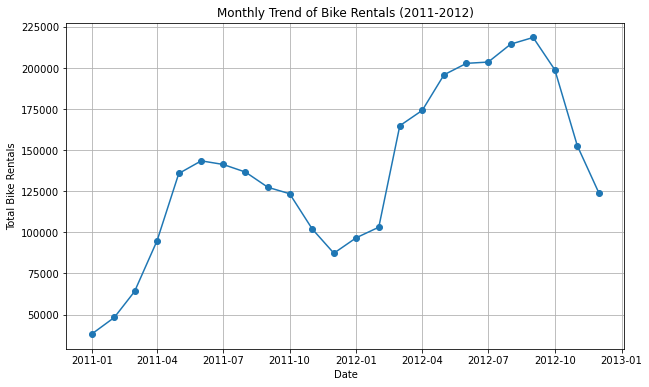

In [46]:
# Plotting the monthly trend of bike rentals
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals['date'], monthly_rentals['total_count'], marker='o', linestyle='-')
plt.title('Monthly Trend of Bike Rentals (2011-2012)')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.grid(True)
plt.show()

Based on the plot, we observe a clear trend in bike rentals over the two-year period from January 2011 to December 2012. Initially, there is a gradual increase in rentals from January to April 2011, reaching a peak around May. Subsequently, rental counts maintain a relatively high level from April to October 2011. However, starting from October 2011, there is a decline in rentals, reaching the lowest point in December 2011. Following this decline, there is a noticeable upward trend, similar to that observed in 2011, with rental counts increasing steadily from January 2012 onwards. The peak rental months appear to be from May to October, with a subsequent decline thereafter.

Additional Insights:
- The peak rental months from May to October suggest a possible seasonal trend, with higher demand for bike rentals during warmer months, likely due to favorable weather conditions.
- Although there are fluctuations in rental counts between 2011 and 2012, the overall trend of peak rentals during the warmer months and lower rentals during colder months remains consistent across both years.
- In general 2012 has a higher bike rental number than 2011

### Question 2: How does weather condition impact bike rentals over the two-year period (2011-2012)?

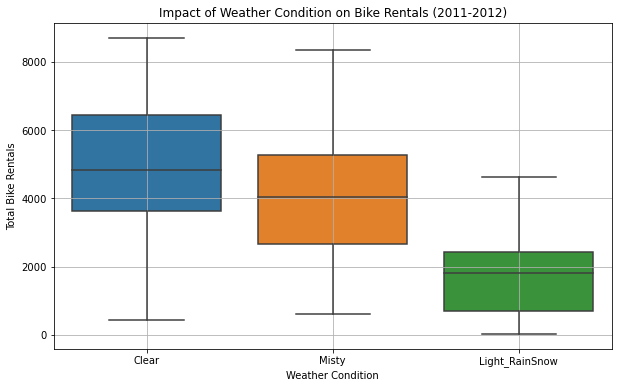

In [51]:
# Plotting the impact of weather condition on bike rentals over the two-year period
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather', y='total_count')
plt.title('Impact of Weather Condition on Bike Rentals (2011-2012)')
plt.xlabel('Weather Condition')
plt.ylabel('Total Bike Rentals')
plt.grid(True)
plt.show()


From the box plot depicting the impact of weather conditions on bike rentals over the two-year period, we observe varying distributions of rental counts across different weather conditions. Clear weather conditions tend to have the highest median rental counts. Misty conditions exhibit a slightly lower median rental count range. Lastly, light rain or snow conditions show the lowest median rental counts.

Additional Insight:
- The box plot highlights the dependency of bike rental demand on weather conditions. Clear weather conditions, typically associated with favorable outdoor conditions, tend to attract more bike rentals compared to misty or rainy conditions.

### Question 3: What is the daily bike rental pattern on weekdays versus weekends over the two-year period (2011-2012)?

In [52]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week (weekday) from the 'date' column
df['weekday'] = df['date'].dt.day_name()

# Group by weekday and calculate the average rental counts
daily_rentals = df.groupby('weekday')['total_count'].mean()

# Define the order of weekdays for proper visualization
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


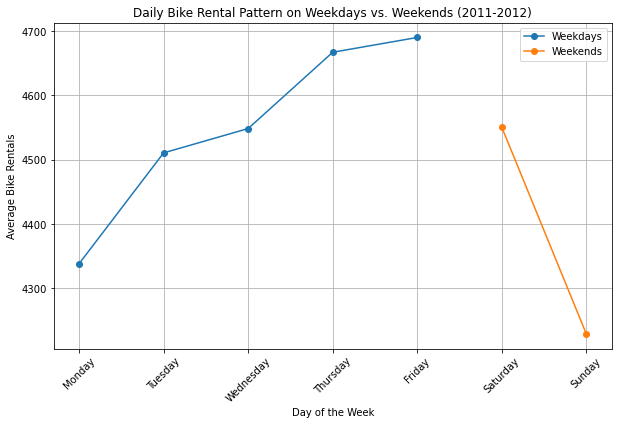

In [53]:
# Plotting the daily bike rental pattern on weekdays versus weekends
plt.figure(figsize=(10, 6))
plt.plot(daily_rentals.loc[weekdays_order[:-2]], label='Weekdays', marker='o')
plt.plot(daily_rentals.loc[['Saturday', 'Sunday']], label='Weekends', marker='o')
plt.title('Daily Bike Rental Pattern on Weekdays vs. Weekends (2011-2012)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bike Rentals')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

From the plot illustrating the average daily bike rental pattern on weekdays versus weekends over the two-year period (2011-2012), it is evident that weekdays, encompassing Monday through Friday, experience higher average bike rental counts compared to weekends, comprising Saturday and Sunday.

Additional Insights:
- On average, weekdays (Monday to Friday) exhibit higher bike rental counts compared to weekends (Saturday and Sunday). The highest average rental count is observed on Thursdays, followed closely by Fridays. Mondays, Tuesdays, and Wednesdays also show relatively high average rental counts.
- While weekends generally experience lower bike rental counts compared to weekdays, Saturdays tend to have slightly higher average rental counts compared to Sundays. However, both Saturdays and Sundays show lower average rental counts compared to weekdays.
- Upon analysis, it was discovered that the two consecutive days with the lowest average bike rentals are observed on Sunday and Monday, contrary to the expected pattern of lower rentals on weekends, specifically Saturday and Sunday.

### Addition : K-means clustering

C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


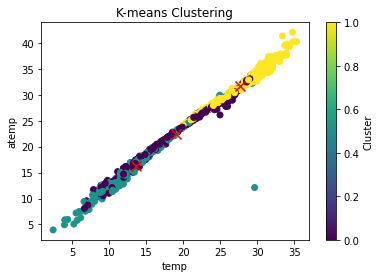

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

features = ['temp', 'atemp', 'humidity', 'windspeed']
num_clusters = 3
X = df[features]
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init = 10)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


import matplotlib.pyplot as plt

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  # Plot cluster centers
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [94]:
print("Cluster Centers:")
print(cluster_centers)

print("Cluster Sizes:")
for i in range(num_clusters):
    cluster_size = np.sum(cluster_labels == i)
    print(f"Cluster {i}: {cluster_size} data points")


Cluster Centers:
[[18.98234802 22.43589224 77.86404612 11.73652488]
 [13.59426926 16.2808692  49.81489567 15.0863766 ]
 [27.67147464 31.68613294 60.05930902 11.64330038]]
Cluster Sizes:
Cluster 0: 245 data points
Cluster 1: 231 data points
Cluster 2: 255 data points


### Cluster 0:
- **Characteristics:**
  - Temperature (Scaled): Moderate temperatures, with an average value around 18.98°C.
  - Feeling Temperature (Scaled): Moderate feeling temperatures, with an average value around 22.44°C.
  - Humidity (Scaled): Relatively high humidity levels, with an average value around 77.86%.
  - Windspeed (Scaled): Moderate windspeed, with an average value around 11.74 km/h.
- **Interpretation:**
  - This cluster represents weather conditions with moderate temperatures and feeling temperatures. However, it tends to have relatively high humidity levels. The windspeed is moderate, suggesting calm to mild weather conditions. These conditions could be conducive to outdoor activities like bike riding, although the higher humidity levels might slightly affect comfort.

### Cluster 1:
- **Characteristics:**
  - Temperature (Scaled): Relatively low temperatures, with an average value around 13.59°C.
  - Feeling Temperature (Scaled): Relatively low feeling temperatures, with an average value around 16.28°C.
  - Humidity (Scaled): Moderate humidity levels, with an average value around 49.81%.
  - Windspeed (Scaled): Moderate windspeed, with an average value around 15.09 km/h.
- **Interpretation:**
  - This cluster represents weather conditions with cooler temperatures and feeling temperatures. Humidity levels are moderate, and windspeed is also moderate. These conditions might indicate cooler weather, which could impact outdoor activities like bike riding. However, the moderate windspeed might compensate for the lower temperatures, making it still feasible for bike rentals.

### Cluster 2:
- **Characteristics:**
  - Temperature (Scaled): Relatively high temperatures, with an average value around 27.67°C.
  - Feeling Temperature (Scaled): Relatively high feeling temperatures, with an average value around 31.69°C.
  - Humidity (Scaled): Moderate humidity levels, with an average value around 60.06%.
  - Windspeed (Scaled): Moderate windspeed, with an average value around 11.64 km/h.
- **Interpretation:**
  - This cluster represents weather conditions with warmer temperatures and feeling temperatures. Humidity levels are moderate, and windspeed is also moderate. These conditions suggest warm and possibly humid weather, which might be favorable for outdoor activities like bike riding. The moderate windspeed could contribute to comfortable riding conditions.


## Conclusion

Conclusion for Question 1:
- The monthly trend of bike rentals over the two-year period (2011-2012) indicates fluctuating patterns.
- Rentals gradually increase from January to May, peaking steadily until October.
- Subsequently, there is a decline in rental counts until January of the following year, followed by a rise similar to the previous year.
- Peak rental months are observed from May to October, with a subsequent decline.

Conclusion for Question 2:

- Weather conditions significantly impact bike rentals over the two-year period (2011-2012).
- Clear weather conditions tend to result in higher average rental counts compared to misty or rainy conditions.
- Favorable weather conditions, such as clear skies, create a more conducive environment for outdoor activities like biking.
- Good weather tends to increase interest in biking, leading to higher rental counts.

Conclusion for Question 3:

- The daily bike rental pattern on weekdays versus weekends over the two-year period (2011-2012) shows distinct differences.
- Weekdays, encompassing Monday through Friday, experience higher average bike rental counts compared to weekends (Saturday and Sunday).
The two consecutive days with the lowest average bike rentals are observed on Sunday and Monday, contrary to the expected pattern of lower rentals on weekends (Saturday and Sunday).

In [96]:
df.to_csv("day_bike.csv")